Problem 123: Dimensionality and the scaling of entropy

First generate 10^6 points in the (x,y) plane that fall on the circle x^2 + y^2 = 1.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from IPython.display import display, Math, Latex

In [53]:
x = [np.random.uniform(-1,1) for _ in range(1000000)]
def pos_or_neg():
    var = np.random.random()
    if var >=0.5: return 1
    elif var < 0.5: return -1
y = [np.sqrt(1-np.square(x[i]))*pos_or_neg() for i in range(len(x))]

(-2, 2)

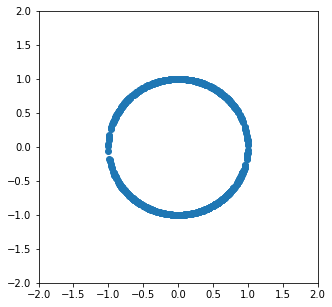

In [54]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(x[1:1000],y[1:1000])
plt.xlim(-2,2)
plt.ylim(-2,2)

Now want to divide this plane into boxes of size dx by dx

In [4]:
def frac_pts_in_dx(x,y,num_bins_x,num_bins_y,oneTime):
    counts, xedges, yedges, Image = plt.hist2d(x,y, bins = [num_bins_x,num_bins_y], range = [[-2, 2], [-2, 2]], norm = LogNorm());
    if oneTime == True: 
        clb = plt.colorbar(label= 'Number of Points')
        plt.xlim(-2,2)
        plt.ylim(-2,2)
        plt.xlabel('x')
        plt.ylabel('y')
    dx = 4/num_bins_x
    return counts/len(x)

Now need to compute the entropy from these values. We know that the entropy is defined as $S = -\sum_{n} p_{n} \log_2 p_{n}$, where $p_{n}$ is actually the output of my function frac_pts_in_dx. n is just all of the boxes. 

In [5]:
#first, need to flatten the array
def calc_entropy_dx(x,y,num_bins_x,num_bins_y,oneTime):
    count = frac_pts_in_dx(x,y,num_bins_x,num_bins_y,oneTime).flatten()
    entropy = 0;
    for n in range(len(count)):
        if count[n] !=0:
            entropy = entropy + count[n]*np.log2(count[n])
    entropy = -entropy
    #print('Entropy = '+str(entropy))
    return entropy
    

6.30055282059029

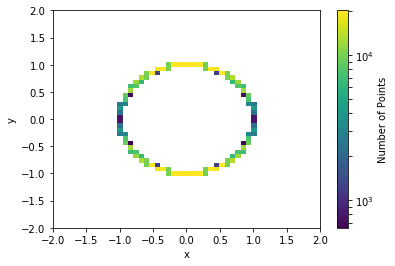

In [6]:
calc_entropy_dx(x,y,50,50, True)

In [7]:
%%capture
entropy_list = []
num_bin_increases = 500
for dx_size in range(1,num_bin_increases+1):
    entropy_list.append(calc_entropy_dx(x,y,dx_size,dx_size, False));

Text(0.5,1,'Entropy for n x n array of bins')

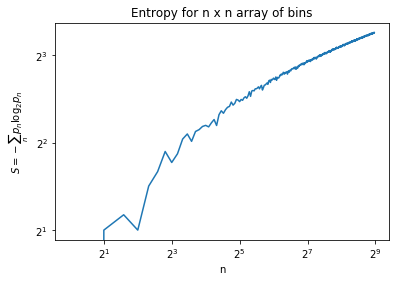

In [14]:
plt.plot(np.linspace(1,num_bin_increases,num_bin_increases),entropy_list)
plt.yscale("log",basey=2)
plt.xscale("log",basex=2)
plt.xlabel('n')
plt.ylabel('$S = -\sum_{n} p_{n} \log_2 p_{n}$')
plt.title('Entropy for n x n array of bins')

Part c says to add a bit of noise in the x and y directions. This is Gaussian noise with $\sigma = 0.05$. 

(-2, 2)

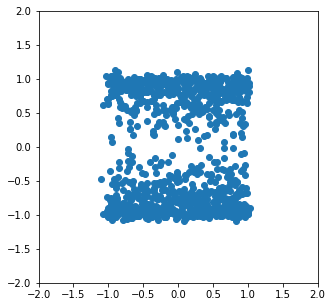

In [9]:
#can check if added noise in properly
x_noise = [(np.random.uniform(-1,1)+ np.random.normal(loc=0,scale=0.05)) for _ in range(1000000)]
y_noise = [(np.sqrt(1-np.square(x[i]))*pos_or_neg() + np.random.normal(loc=0,scale=0.05)) for i in range(len(x))]

fig = plt.figure(figsize=(5, 5))
plt.scatter(x_noise[1:1000],y_noise[1:1000])
plt.xlim(-2,2)
plt.ylim(-2,2)

10.954768292070309

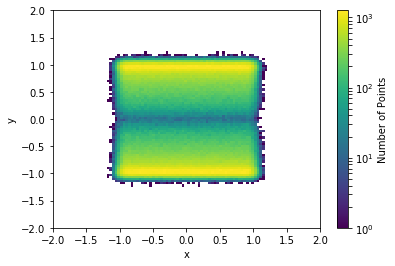

In [10]:
calc_entropy_dx(x_noise,y_noise,100,100, True)

In [11]:
%%capture
entropy_list_noise = []
num_bin_increases_noise = 500
for dx_size in range(1,num_bin_increases_noise+1):
    entropy_list_noise.append(calc_entropy_dx(x_noise,y_noise,dx_size,dx_size, False));

Text(0.5,1,'Entropy for n x n array of bins with Noise')

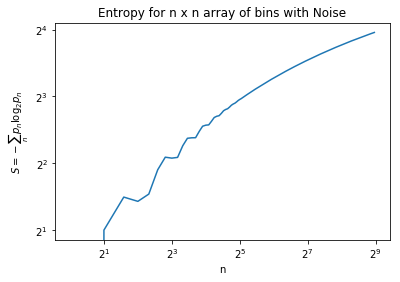

In [15]:
plt.plot(np.linspace(1,num_bin_increases_noise,num_bin_increases_noise),entropy_list_noise)
plt.yscale("log", basey=2)
plt.xscale("log",basex=2)
plt.xlabel('n')
plt.ylabel('$S = -\sum_{n} p_{n} \log_2 p_{n}$')
plt.title('Entropy for n x n array of bins with Noise')

Text(0.5,1,'Entropy for n x n array of bins with Noise')

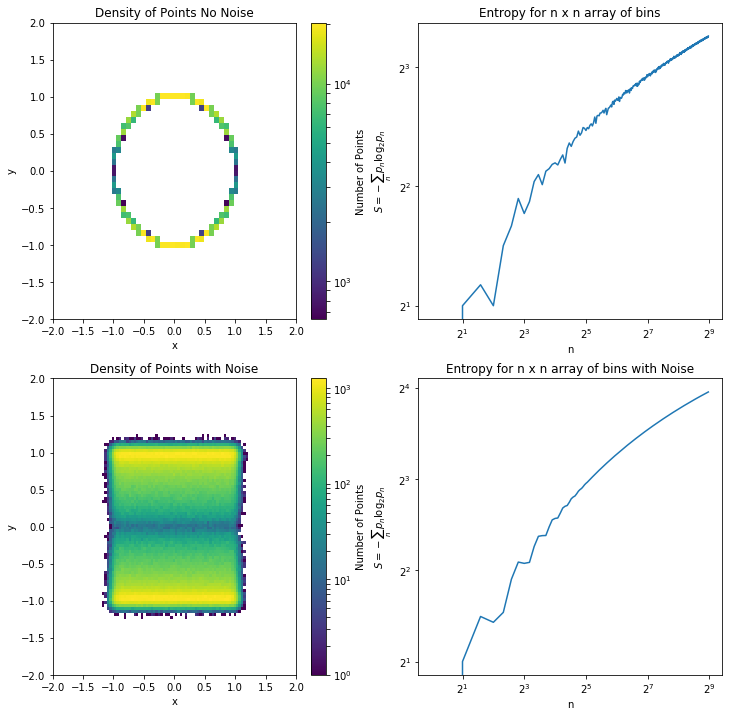

In [34]:
plt.figure(figsize=(12, 12))

plt.subplot(2,2,1)
calc_entropy_dx(x,y,50,50, True)
plt.title('Density of Points No Noise')

plt.subplot(2,2,2)
plt.plot(np.linspace(1,num_bin_increases,num_bin_increases),entropy_list)
plt.yscale("log",basey=2)
plt.xscale("log",basex=2)
plt.xlabel('n')
plt.ylabel('$S = -\sum_{n} p_{n} \log_2 p_{n}$')
plt.title('Entropy for n x n array of bins')

plt.subplot(2,2,3)
calc_entropy_dx(x_noise,y_noise,100,100, True)
plt.title('Density of Points with Noise')

plt.subplot(2,2,4)
plt.plot(np.linspace(1,num_bin_increases_noise,num_bin_increases_noise),entropy_list_noise)
plt.yscale("log",basey=2)
plt.xscale("log",basex=2)
plt.xlabel('n')
plt.ylabel('$S = -\sum_{n} p_{n} \log_2 p_{n}$')
plt.title('Entropy for n x n array of bins with Noise')


Text(0.5,1,'Entropy for bins of size $\\delta$x')

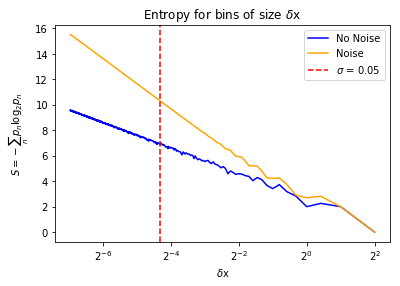

In [52]:
delta_x = []
for x in range(1,num_bin_increases+1):
    delta_x.append(4/x)
plt.plot(delta_x,entropy_list,color = 'blue',label='No Noise')
plt.plot(delta_x,entropy_list_noise, color = 'orange',label='Noise')
#plt.yscale("log",basey=2)
plt.xscale("log",basex=2)
plt.xlabel('$\delta$x')
plt.ylabel('$S = -\sum_{n} p_{n} \log_2 p_{n}$')
plt.axvline(x=0.05,ls ='--',color = 'red',label = '$\sigma$ = 0.05')
plt.legend()
plt.title('Entropy for bins of size $\delta$x'  )

To answer the question in part b, the signature of reduced dimensionality is the fact that the entropy vs dx line is approximately a line with constant slope. For part c, it can be seen that as $\delta$x >>$\sigma$, the entropy for the circle with noise corresponds to the one-dimensional version, the circle with no noise. But, as $\delta$x <<$\sigma$, the entropy of the circle with noise diverges from the one without noise. The slope of the with noise line is approximately twice that of the without noise line in this limit. 

Text(0.5,1,'Entropy for n x n array of bins with Noise')

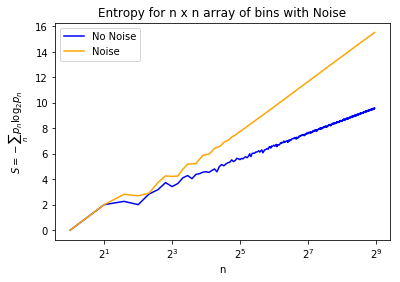

In [42]:
plt.plot(np.linspace(1,num_bin_increases,num_bin_increases),entropy_list,color = 'blue',label='No Noise')
plt.plot(np.linspace(1,num_bin_increases_noise,num_bin_increases_noise),entropy_list_noise, color = 'orange',label='Noise')
plt.legend()
#plt.yscale("log",basey=2)
plt.xscale("log",basex=2)
plt.xlabel('n')
plt.ylabel('$S = -\sum_{n} p_{n} \log_2 p_{n}$')
plt.title('Entropy for n x n array of bins with Noise')